### This notebook will serve as a sandbox for bespoke visualizations for the project

In [1]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import helper 
import warnings
warnings.filterwarnings('ignore')

# load the data
data = pd.read_csv('../data/benchmark_features.csv')

data.shape

(1321, 149)

In [2]:
methadone = data[[col for col in data.columns if 'methadone' in col]].iloc[:, :5]
methadone['total_doses'] = methadone.mean(axis=1)
buprenorphine = data[[col for col in data.columns if 'buprenorphine' in col]].iloc[:, :5]
buprenorphine['total_doses'] = buprenorphine.mean(axis=1)


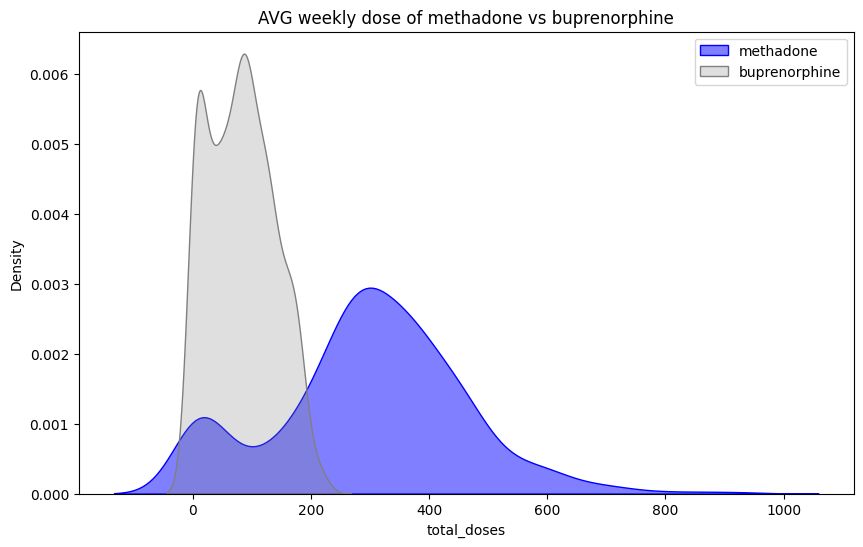

In [3]:
# remove rows that are all 0s?
methadone = methadone.loc[~(methadone==0).all(axis=1)]
buprenorphine = buprenorphine.loc[~(buprenorphine==0).all(axis=1)]

# plot density plot
plt.figure(figsize=(10, 6))
sns.kdeplot(methadone['total_doses'], shade=True, color='blue', alpha=0.5)
sns.kdeplot(buprenorphine['total_doses'], shade=True, color='gray')
plt.title('AVG weekly dose of methadone vs buprenorphine')
plt.legend(['methadone', 'buprenorphine'])
plt.show()


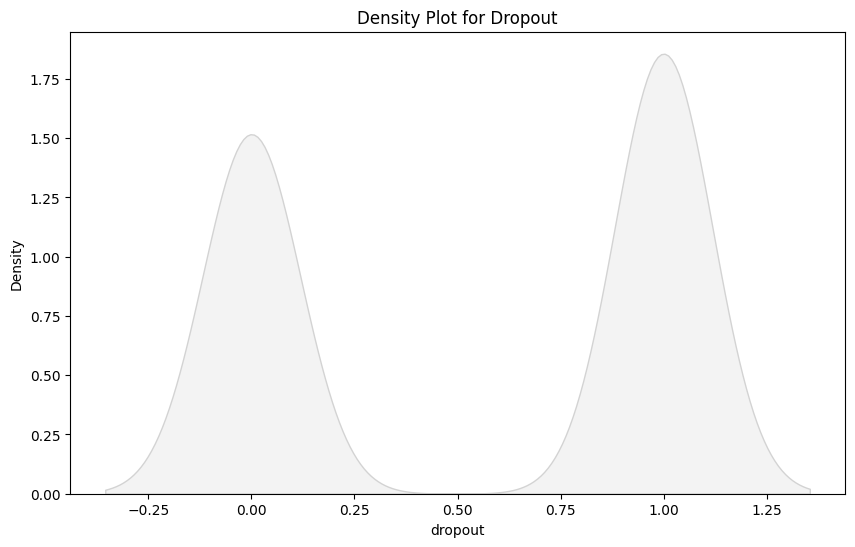

In [4]:
# create a density plot for the target variable
plt.figure(figsize=(10, 6))
sns.kdeplot(data['dropout'], shade=True, color='lightgray', label='dropout')
plt.title('Density Plot for Dropout')
plt.show()

In [5]:
# put columns in alphabetical order
data = data.reindex(sorted(data.columns), axis=1)

# create methadone_doses and buprenorphine_doses columns
data['avg_methadone_dose'] = data[[col for col in data.columns if 'methadone' in col]].mean(axis=1)
data['avg_buprenorphine_dose'] = data[[col for col in data.columns if 'buprenorphine' in col]].mean(axis=1)

data

,cows_postdose,cows_predose,dropout,dsm_alcohol_abuse,dsm_alcohol_dependence,dsm_alcohol_no_diagnosis,dsm_alcohol_not_present,dsm_amphetamine_abuse,dsm_amphetamine_dependence,dsm_amphetamine_no_diagnosis,...,rbs_sexual_activity,survey_opiates_0,survey_opiates_4,test_Opiate300_0,test_Opiate300_1,test_Opiate300_2,test_Opiate300_3,test_Opiate300_4,avg_methadone_dose,avg_buprenorphine_dose
0,6.0,11.0,0.0,0,0,1,0,0,0,1,...,2.0,30.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,212.8
1,1.0,8.0,0.0,0,0,1,0,0,0,1,...,3.0,30.0,5.0,1.0,1.0,1.0,1.0,1.0,0.0,42.4
2,5.0,8.0,0.0,0,0,1,0,0,0,1,...,3.0,30.0,9.0,1.0,1.0,1.0,1.0,1.0,258.0,0.0
3,9.0,11.0,0.0,0,0,1,0,0,0,1,...,3.0,30.0,6.0,1.0,1.0,0.0,1.0,1.0,0.0,116.8
4,6.0,11.0,1.0,0,0,1,0,0,0,1,...,1.0,5.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,9.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1316,0.0,14.0,1.0,0,0,1,0,0,0,1,...,1.0,20.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
1317,0.0,0.0,1.0,0,0,0,1,0,0,0,...,96.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,30.0,0.0
1318,0.0,15.0,1.0,1,0,0,0,0,0,1,...,1.0,30.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
1319,0.0,16.0,1.0,0,0,1,0,0,1,0,...,1.0,30.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.4


In [6]:
# create methadone df
methadone = data[[col for col in data.columns if 'methadone' in col]]

methadone = methadone.loc[~(methadone==0).all(axis=1)]

methadone = methadone.index

methadone = data.loc[methadone].drop(columns=[col for col in data.columns if 'buprenorphine' in col])

methadone

,cows_postdose,cows_predose,dropout,dsm_alcohol_abuse,dsm_alcohol_dependence,dsm_alcohol_no_diagnosis,dsm_alcohol_not_present,dsm_amphetamine_abuse,dsm_amphetamine_dependence,dsm_amphetamine_no_diagnosis,...,rbs_other_opiates,rbs_sexual_activity,survey_opiates_0,survey_opiates_4,test_Opiate300_0,test_Opiate300_1,test_Opiate300_2,test_Opiate300_3,test_Opiate300_4,avg_methadone_dose
2,5.0,8.0,0.0,0,0,1,0,0,0,1,...,0.0,3.0,30.0,9.0,1.0,1.0,1.0,1.0,1.0,258.0
11,10.0,15.0,0.0,1,0,0,0,0,0,1,...,1.0,98.0,26.0,13.0,1.0,1.0,1.0,1.0,0.0,322.0
13,0.0,14.0,0.0,0,0,0,1,0,0,0,...,14.0,2.0,30.0,0.0,1.0,1.0,0.0,0.0,0.0,602.0
15,12.0,18.0,0.0,0,0,0,1,0,0,0,...,15.0,3.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,714.0
19,11.0,12.0,0.0,0,0,1,0,0,0,1,...,15.0,1.0,30.0,0.0,1.0,0.0,0.0,0.0,0.0,326.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,0.0,5.0,1.0,0,0,0,1,0,0,0,...,4.0,1.0,30.0,0.0,1.0,1.0,1.0,1.0,1.0,4.8
1302,0.0,0.0,1.0,0,0,0,1,0,0,0,...,0.0,1.0,30.0,0.0,1.0,1.0,1.0,1.0,1.0,13.0
1305,0.0,0.0,1.0,0,0,1,0,0,0,1,...,30.0,1.0,30.0,0.0,0.0,1.0,1.0,1.0,1.0,16.0
1311,0.0,9.0,1.0,0,0,1,0,0,0,1,...,0.0,1.0,30.0,0.0,1.0,1.0,1.0,1.0,1.0,11.0


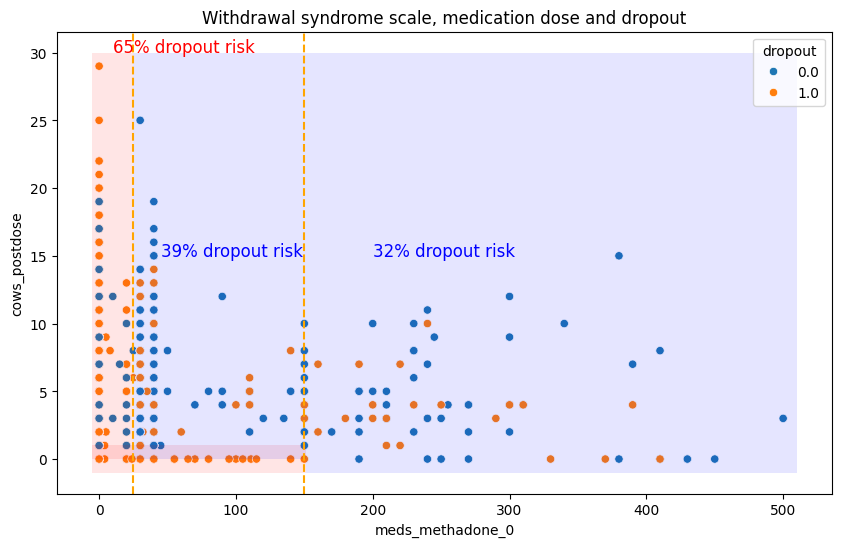

In [47]:
# examine relationship between rbs_heroine, methadone dose and and dropout
plt.figure(figsize=(10, 6))
sns.scatterplot(x='meds_methadone_0', y='cows_postdose', hue='dropout', data=data)
plt.fill_between([-5, 25], 0, 30, color='red', alpha=0.1, edgecolor='none')
plt.fill_between([-5, 151], -1, 1, color='red', alpha=0.10, edgecolor='none')
plt.fill_between([25, 151], 0, 30, color='blue', alpha=0.10, edgecolor='none')
plt.fill_between([151, 510], -1, 30, color='blue', alpha=0.10, edgecolor='none')
plt.axvline(150, color='orange', linestyle='--')
plt.axvline(25, color='orange', linestyle='--')
# annotate the first fill between "65% dropout risk"
plt.text(10, 30, '65% dropout risk', fontsize=12, color='red')
plt.text(45, 15, '39% dropout risk', fontsize=12, color='blue')
plt.text(200, 15, '32% dropout risk', fontsize=12, color='blue')
plt.title('Withdrawal syndrome scale, medication dose and dropout')
plt.show()

In [21]:
data.loc[
        (data.cows_postdose <= 30)&
        (data.meds_methadone_0 >= 150)&
        (data.meds_methadone_0 <= 500)
        ]['dropout'].value_counts(normalize=True)

dropout
0.0    0.678161
1.0    0.321839
Name: proportion, dtype: float64

In [48]:
data.loc[
        (data.cows_postdose <= 30)&
        (data.meds_methadone_0 <= 25)
        ]['dropout'].value_counts(normalize=True)

dropout
1.0    0.656442
0.0    0.343558
Name: proportion, dtype: float64

In [9]:
# create bupe df
buprenorphine = data[[col for col in data.columns if 'buprenorphine' in col]]

buprenorphine = buprenorphine.loc[~(buprenorphine==0).all(axis=1)]

buprenorphine = buprenorphine.index

buprenorphine = data.loc[buprenorphine].drop(columns=[col for col in data.columns if 'methadone' in col])

buprenorphine

,cows_postdose,cows_predose,dropout,dsm_alcohol_abuse,dsm_alcohol_dependence,dsm_alcohol_no_diagnosis,dsm_alcohol_not_present,dsm_amphetamine_abuse,dsm_amphetamine_dependence,dsm_amphetamine_no_diagnosis,...,rbs_other_opiates,rbs_sexual_activity,survey_opiates_0,survey_opiates_4,test_Opiate300_0,test_Opiate300_1,test_Opiate300_2,test_Opiate300_3,test_Opiate300_4,avg_buprenorphine_dose
0,6.0,11.0,0.0,0,0,1,0,0,0,1,...,0.0,2.0,30.0,0.0,1.0,0.0,0.0,0.0,0.0,212.8
1,1.0,8.0,0.0,0,0,1,0,0,0,1,...,0.0,3.0,30.0,5.0,1.0,1.0,1.0,1.0,1.0,42.4
3,9.0,11.0,0.0,0,0,1,0,0,0,1,...,1.0,3.0,30.0,6.0,1.0,1.0,0.0,1.0,1.0,116.8
4,6.0,11.0,1.0,0,0,1,0,0,0,1,...,26.0,1.0,5.0,0.0,1.0,1.0,1.0,1.0,1.0,9.6
5,1.0,18.0,1.0,0,0,1,0,0,0,1,...,0.0,0.0,29.0,0.0,1.0,1.0,1.0,1.0,1.0,49.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1309,0.0,0.0,1.0,0,0,0,1,0,0,0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,4.8
1310,0.0,9.0,1.0,0,0,0,1,0,0,0,...,15.0,1.0,21.0,0.0,1.0,1.0,1.0,1.0,1.0,4.8
1312,0.0,2.0,1.0,0,0,1,0,0,0,1,...,1.0,1.0,27.0,0.0,1.0,1.0,1.0,1.0,1.0,3.2
1315,0.0,26.0,1.0,0,0,0,1,0,0,0,...,4.0,1.0,30.0,0.0,1.0,1.0,1.0,1.0,1.0,3.2


Text(0, 0.5, 'Average Weekly Medication Dose')

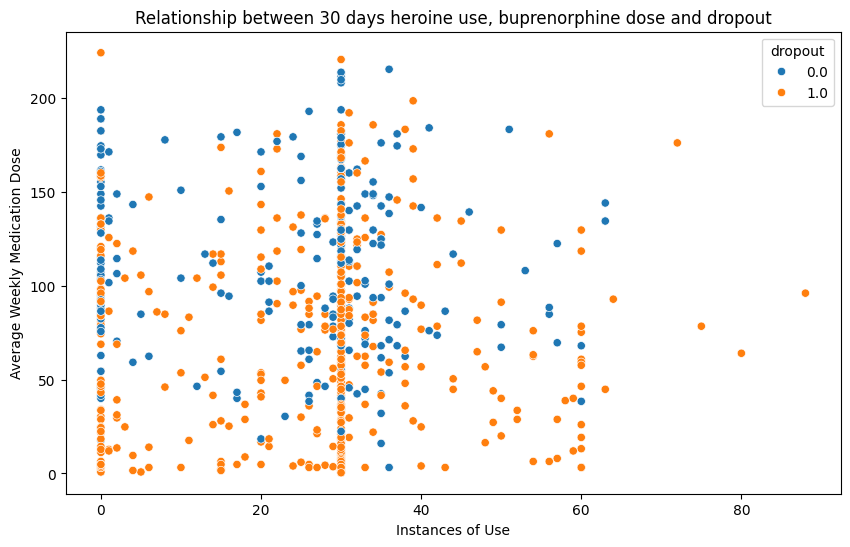

In [10]:
# plot relationship between rbs_heroine, buprenorphine dose and dropout
plt.figure(figsize=(10, 6))
sns.scatterplot(x='rbs_heroine', y='avg_buprenorphine_dose', hue='dropout', data=buprenorphine)
plt.title('Relationship between 30 days heroine use, buprenorphine dose and dropout')
plt.xlabel('Instances of Use')
plt.ylabel('Average Weekly Medication Dose')


In [11]:
data.columns

Index(['cows_postdose', 'cows_predose', 'dropout', 'dsm_alcohol_abuse',
       'dsm_alcohol_dependence', 'dsm_alcohol_no_diagnosis',
       'dsm_alcohol_not_present', 'dsm_amphetamine_abuse',
       'dsm_amphetamine_dependence', 'dsm_amphetamine_no_diagnosis',
       ...
       'rbs_sexual_activity', 'survey_opiates_0', 'survey_opiates_4',
       'test_Opiate300_0', 'test_Opiate300_1', 'test_Opiate300_2',
       'test_Opiate300_3', 'test_Opiate300_4', 'avg_methadone_dose',
       'avg_buprenorphine_dose'],
      dtype='object', length=151)

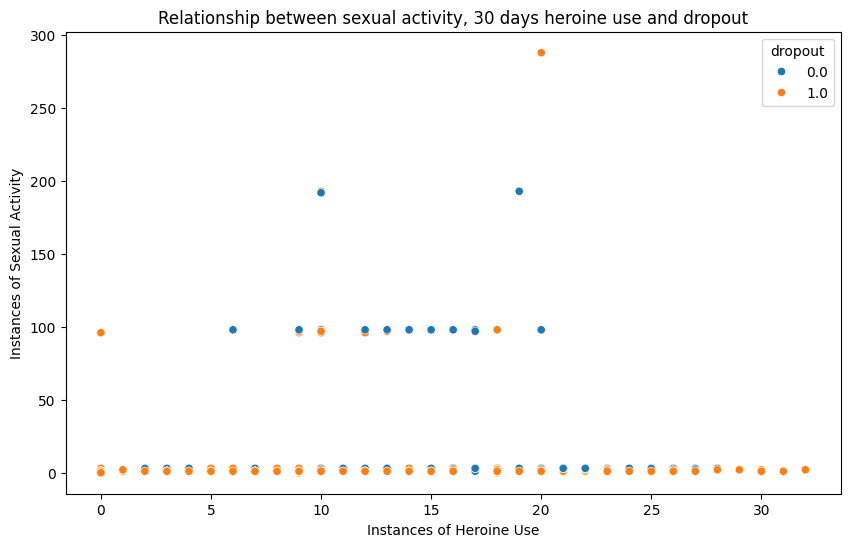

In [12]:
# relationship sexual activity, heroin use and dropout
plt.figure(figsize=(10, 6))
sns.scatterplot(y='rbs_sexual_activity', x='cows_predose', hue='dropout', data=data)
plt.title('Relationship between sexual activity, 30 days heroine use and dropout')
plt.xlabel('Instances of Heroine Use')
plt.ylabel('Instances of Sexual Activity')
plt.show()


In [13]:
data.columns.tolist()

['cows_postdose',
 'cows_predose',
 'dropout',
 'dsm_alcohol_abuse',
 'dsm_alcohol_dependence',
 'dsm_alcohol_no_diagnosis',
 'dsm_alcohol_not_present',
 'dsm_amphetamine_abuse',
 'dsm_amphetamine_dependence',
 'dsm_amphetamine_no_diagnosis',
 'dsm_amphetamine_not_present',
 'dsm_cannabis_abuse',
 'dsm_cannabis_dependence',
 'dsm_cannabis_no_diagnosis',
 'dsm_cannabis_not_present',
 'dsm_cocaine_abuse',
 'dsm_cocaine_dependence',
 'dsm_cocaine_no_diagnosis',
 'dsm_cocaine_not_present',
 'dsm_opiates_dependence',
 'dsm_opiates_not_present',
 'dsm_sedative_abuse',
 'dsm_sedative_dependence',
 'dsm_sedative_no_diagnosis',
 'dsm_sedative_not_present',
 'mdh_alc_withdrawal_no_history',
 'mdh_alc_withdrawal_not_evaluated',
 'mdh_alc_withdrawal_yes_history',
 'mdh_allergies_no_history',
 'mdh_allergies_not_evaluated',
 'mdh_allergies_yes_history',
 'mdh_anxiety_disorder_no_history',
 'mdh_anxiety_disorder_not_evaluated',
 'mdh_anxiety_disorder_yes_history',
 'mdh_asthma_no_history',
 'mdh_ast

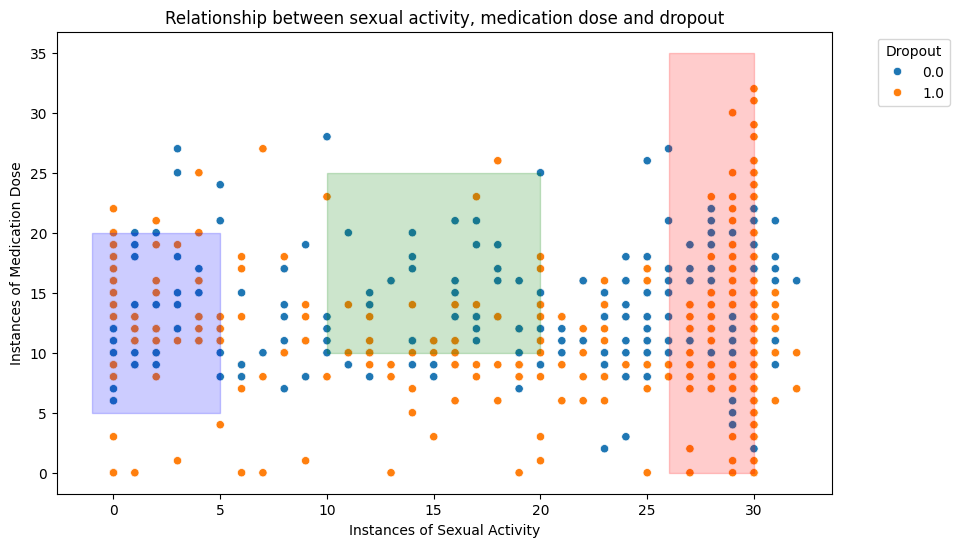

In [14]:
# relationship, sexual activity, medication dose, dropout
plt.figure(figsize=(10, 6))
sns.scatterplot(x='survey_opiates_0', y='cows_predose', hue='dropout', data=data)
# can I shade an area with a background color red?
plt.title('Relationship between sexual activity, medication dose and dropout')
plt.xlabel('Instances of Sexual Activity')
plt.ylabel('Instances of Medication Dose')
# move legend outside of plot and annotate legend
plt.legend(title='Dropout', bbox_to_anchor=(1.05, 1), loc='upper left')
# Shade the area with a background color red
# plt.fill_betweenx(y=[30, 29], x1=0, x2=26, color='red', alpha=0.3)
plt.fill_betweenx(y=[0, 35], x1=26, x2=30, color='red', alpha=0.2)
plt.fill_betweenx(y=[5, 20], x1=-1, x2=5, color='blue', alpha=0.2)
plt.fill_between(x=[10, 20], y1=10, y2=25, color='green', alpha=0.2)
plt.show()